Prologue

Welcome to my Final_Projecct!
Here I will try to show what I learnd from RCS course.
For my final project I decided to work with "Formula 1" data. I founded a ready to use CSV files. The data gathered from 1950 until nowadays. 

In [188]:
#Library's
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
pd.set_option('max_columns', 10, 'max_rows', 50, 'max_colwidth', 20)
import seaborn as sb

Part 1

Lets see some data about location wich helded GP's.

In [189]:
#Load file
f1s = pd.read_csv("/Users/pavel/GitHub/Final_Project/f1db_csv/circuits.csv")
f1s

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Gran...,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipe...
1,2,sepang,Sepang Internati...,Kuala Lumpur,Malaysia,2.76083,101.73800,\N,http://en.wikipe...
2,3,bahrain,Bahrain Internat...,Sakhir,Bahrain,26.03250,50.51060,\N,http://en.wikipe...
3,4,catalunya,Circuit de Barce...,Montmeló,Spain,41.57000,2.26111,\N,http://en.wikipe...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,\N,http://en.wikipe...
...,...,...,...,...,...,...,...,...,...
69,70,red_bull_ring,Red Bull Ring,Spielburg,Austria,47.21970,14.76470,\N,http://en.wikipe...
70,71,sochi,Sochi Autodrom,Sochi,Russia,43.40570,39.95780,\N,http://en.wikipe...
71,72,port_imperial,Port Imperial St...,New Jersey,USA,40.77690,-74.01110,\N,http://en.wikipe...
72,73,BAK,Baku City Circuit,Baku,Azerbaijan,40.37250,49.85330,\N,http://en.wikipe...


In [190]:
#Lets clean some not data
f1s_circuits = f1s.drop(columns=['circuitRef','lat','lng','alt','url'])
#Clean data for circuit Vietnam, becouse it was postponed from 2020 calendar
f1s_circuits_1 = f1s_circuits[f1s_circuits.country != 'Vietnam'] 

In [191]:
#Lets see how many countrys helded GP
circuits_country = f1s_circuits_1.sort_values(['country'], ascending=True).drop_duplicates(subset=['country'])
circuits_country[['country']]

,country
24,Argentina
0,Australia
69,Austria
72,Azerbaijan
2,Bahrain
39,Belgium
17,Brazil
51,Canada
16,China
54,France


In [192]:
#By these simple code we can understand that GP was held in 32 diefferent countrys.
circuits_country.shape
#32 countrys

(32, 4)

In [193]:
f1s_circuits_1.sort_values(['country'], ascending=True)

,circuitId,name,location,country
24,25,Autódromo Juan y...,Buenos Aires,Argentina
0,1,Albert Park Gran...,Melbourne,Australia
28,29,Adelaide Street ...,Adelaide,Australia
69,70,Red Bull Ring,Spielburg,Austria
56,57,Zeltweg,Styria,Austria
...,...,...,...,...
41,42,Fair Park,Dallas,USA
71,72,Port Imperial St...,New Jersey,USA
68,69,Circuit of the A...,Austin,USA
32,33,Phoenix street c...,Phoenix,USA


In [194]:
#Lets see how many circuits helded GP
f1s_circuits_1.shape
#73 circuits

(73, 4)

In [195]:
#Lets see how many diferent circuits helded GP in same country
dup_countrys = f1s_circuits_1.pivot_table(index=['country'], aggfunc='size')
dup_countrys

country
Argentina        1
Australia        2
Austria          3
Azerbaijan       1
Bahrain          1
Belgium          3
Brazil           2
Canada           3
China            1
France           7
Germany          3
Hungary          1
India            1
Italy            3
Japan            3
Korea            1
Malaysia         1
Mexico           1
Monaco           1
Morocco          1
Netherlands      1
Portugal         3
Russia           1
Singapore        1
South Africa     2
Spain            6
Sweden           1
Switzerland      1
Turkey           1
UAE              1
UK               4
USA             11
dtype: int64

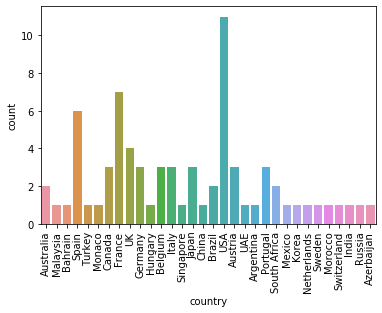

In [196]:
#Some graphics about how many circuits helded GP in same counrty
g = sb.countplot('country',data=f1s_circuits_1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()


Part 2

Lets see data about constructors

In [197]:
f1con_res = pd.read_csv("/Users/pavel/GitHub/Final_Project/f1db_csv/constructor_results.csv")
f1con_res_clean = f1con_res.drop(columns=['status'])
f1con_res_clean

,constructorResultsId,raceId,constructorId,points
0,1,18,1,14.0
1,2,18,2,8.0
2,3,18,3,9.0
3,4,18,4,5.0
4,5,18,5,2.0
...,...,...,...,...
11555,16055,1030,5,2.0
11556,16056,1030,4,0.0
11557,16057,1030,51,0.0
11558,16058,1030,210,0.0


In [198]:
f1con_stan = pd.read_csv("/Users/pavel/GitHub/Final_Project/f1db_csv/constructor_standings.csv")
f1con_stan_clean = f1con_stan.drop(columns=['positionText'])
f1con_stan_clean

,constructorStandingsId,raceId,constructorId,points,position,wins
0,1,18,1,14.0,1,1
1,2,18,2,8.0,3,0
2,3,18,3,9.0,2,0
3,4,18,4,5.0,4,0
4,5,18,5,2.0,5,0
...,...,...,...,...,...,...
12321,27468,1035,211,0.0,6,0
12322,27469,1035,9,0.0,7,0
12323,27470,1035,4,0.0,8,0
12324,27471,1035,212,0.0,9,0


In [199]:
f1con = pd.read_csv("/Users/pavel/GitHub/Final_Project/f1db_csv/constructors.csv")
f1con_clean = f1con.drop(columns=['constructorRef','url'])
f1con_clean

,constructorId,name,nationality
0,1,McLaren,British
1,2,BMW Sauber,German
2,3,Williams,British
3,4,Renault,French
4,5,Toro Rosso,Italian
...,...,...,...
205,208,Lotus F1,British
206,209,Manor Marussia,British
207,210,Haas F1 Team,American
208,211,Racing Point,British


In [200]:
f1con_clean.shape
#210 teams took part in GP's from 1950.

(210, 3)

In [201]:
#Merge 2 data sets together
f1con_all = f1con_clean.merge(f1con_stan_clean, on='constructorId')
f1con_all

,constructorId,name,nationality,constructorStandingsId,raceId,points,position,wins
0,1,McLaren,British,1,18,14.0,1,1
1,1,McLaren,British,7,19,24.0,1,1
2,1,McLaren,British,18,20,28.0,3,1
3,1,McLaren,British,29,21,34.0,3,1
4,1,McLaren,British,40,22,42.0,3,1
...,...,...,...,...,...,...,...,...
12321,211,Racing Point,British,27439,1028,65.0,6,0
12322,211,Racing Point,British,27449,1029,67.0,7,0
12323,211,Racing Point,British,27459,1030,73.0,7,0
12324,211,Racing Point,British,27468,1035,0.0,6,0


nationality
American         39
Australian        1
Austrian          1
Belgium           1
Brazilian         1
British          86
Canadian          2
Dutch             3
East German       1
French           12
German           10
Hong Kong         1
Indian            1
Irish             1
Italian          30
Japanese          5
Malaysian         2
Mexican           1
New Zealand       1
Rhodesian         1
Russian           2
South African     3
Spanish           1
Swiss             4
dtype: int64


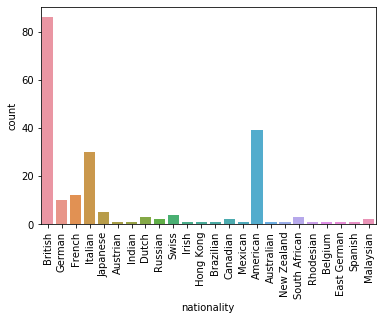

In [202]:
#Lets see how many teams belongs to diferrent nationality's.
f1con_nat = f1con_clean.pivot_table(index=['nationality'], aggfunc='size')
print(f1con_nat)
cn = sb.countplot('nationality',data = f1con_clean)
cn.set_xticklabels(cn.get_xticklabels(), rotation=90)
plt.show()

In [224]:
#I want to see wich nations got only one team
array = ['Austrian', 'Belgium', 'Brazilian', 'East German', 'Hong Kong', 'Indian', 'Irish', 'Mexican', 'New Zealand', 'Rhodesian', 'Spanish']
f1con_clean_one = f1con_clean.loc[f1con_clean['nationality'].isin(array)]
f1con_clean_one

,constructorId,name,nationality
8,9,Red Bull,Austrian
9,10,Force India,Indian
16,17,Jordan,Irish
53,55,Theodore,Hong Kong
54,56,Fittipaldi,Brazilian
60,62,Rebaque,Mexican
76,78,Amon,New Zealand
91,93,RE,Rhodesian
98,100,ENB,Belgium
144,146,EMW,East German


In [225]:
f1con_clean.loc[f1con_clean['nationality'] == 'Russian']
#I was impressed discovered that Russia got two teams in history of formula 1.

,constructorId,name,nationality
12,13,MF1,Russian
203,206,Marussia,Russian


In [237]:
#Lets see wich team got most wins in history of Formula 1 
f1con_wins = f1con_all[['name','wins']]
f1con_most_wins = f1con_wins.loc[f1con_wins['wins'] == 1]
f1con_most_wins_1 = f1con_most_wins.pivot_table(index=['name'], aggfunc='size')
f1con_most_wins_1.sort_values(ascending=False)

name
Ferrari            192
McLaren            126
Williams           112
Brabham             70
BRM                 62
Tyrrell             55
Red Bull            39
Benetton            37
Renault             37
Team Lotus          31
Ligier              29
Mercedes            28
Jordan              24
Lotus F1            22
March               19
Cooper-Climax       15
BMW Sauber          12
Cooper-Maserati     12
Lotus-Ford          11
Lotus-Climax        11
Honda               10
Eagle-Weslake        8
Hesketh              7
Brabham-Climax       6
McLaren-Ford         6
Penske               6
Porsche              6
Shadow               6
Wolf                 5
Toro Rosso           5
Brabham-Repco        4
Matra-Ford           4
Stewart              3
Brabham-Ford         2
Vanwall              2
Lotus-BRM            2
Cooper               1
Brawn                1
dtype: int64

Part 3

Lets see some data about drivers.

In [242]:
f1_drivers = pd.read_csv("/Users/pavel/GitHub/Final_Project/f1db_csv/drivers.csv")
f1_dr_cl = f1_drivers.drop(columns=['driverRef','number','code','url'])
f1_dr_cl

,driverId,forename,surname,dob,nationality
0,1,Lewis,Hamilton,1985-01-07,British
1,2,Nick,Heidfeld,1977-05-10,German
2,3,Nico,Rosberg,1985-06-27,German
3,4,Fernando,Alonso,1981-07-29,Spanish
4,5,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...
843,845,Sergey,Sirotkin,1995-08-27,Russian
844,846,Lando,Norris,1999-11-13,British
845,847,George,Russell,1998-02-15,British
846,848,Alexander,Albon,1996-03-23,Thai


In [245]:
f1_driver_standings = pd.read_csv("/Users/pavel/GitHub/Final_Project/f1db_csv/driver_standings.csv")
f1_dr_st_cl = f1_driver_standings.drop(columns=['positionText'])
f1_dr_st_cl

,driverStandingsId,raceId,driverId,points,position,wins
0,1,18,1,10.0,1,1
1,2,18,2,8.0,2,0
2,3,18,3,6.0,3,0
3,4,18,4,5.0,4,0
4,5,18,5,4.0,5,0
...,...,...,...,...,...,...
32581,69784,1035,832,0.0,17,0
32582,69785,1035,844,0.0,9,0
32583,69786,1035,840,0.0,18,0
32584,69787,1035,830,0.0,19,0


In [246]:
f1_dr_all = f1_dr_st_cl.merge(f1_dr_cl, on='driverId')
f1_dr_all

,driverStandingsId,raceId,driverId,points,position,wins,forename,surname,dob,nationality
0,1,18,1,10.0,1,1,Lewis,Hamilton,1985-01-07,British
1,9,19,1,14.0,1,1,Lewis,Hamilton,1985-01-07,British
2,27,20,1,14.0,3,1,Lewis,Hamilton,1985-01-07,British
3,48,21,1,20.0,2,1,Lewis,Hamilton,1985-01-07,British
4,69,22,1,28.0,3,1,Lewis,Hamilton,1985-01-07,British
...,...,...,...,...,...,...,...,...,...,...
32581,69700,1028,846,41.0,11,0,Lando,Norris,1999-11-13,British
32582,69720,1029,846,45.0,11,0,Lando,Norris,1999-11-13,British
32583,69740,1030,846,49.0,11,0,Lando,Norris,1999-11-13,British
32584,69778,1035,846,0.0,11,0,Lando,Norris,1999-11-13,British


In [248]:
#Lets find most youngest and most older driver.
#I will do it by sort_values
f1_dr_cl.sort_values(['dob'],ascending=False)
#And we can see that Lando Norris is the most youngest driver in Formula 1


,driverId,forename,surname,dob,nationality
844,846,Lando,Norris,1999-11-13,British
839,840,Lance,Stroll,1998-10-29,Canadian
845,847,George,Russell,1998-02-15,British
842,844,Charles,Leclerc,1997-10-16,Monegasque
829,830,Max,Verstappen,1997-09-30,Dutch
...,...,...,...,...,...
589,589,Louis,Chiron,1899-08-03,Monegasque
703,703,Arthur,Legat,1898-11-01,Belgian
791,791,Clemente,Biondetti,1898-08-18,Italian
786,786,Luigi,Fagioli,1898-06-09,Italian


In [249]:
f1_dr_cl.sort_values(['dob'],ascending=True)
#The most oldest driver is Philippe Etancelin

,driverId,forename,surname,dob,nationality
741,741,Philippe,Étancelin,1896-12-28,French
786,786,Luigi,Fagioli,1898-06-09,Italian
791,791,Clemente,Biondetti,1898-08-18,Italian
703,703,Arthur,Legat,1898-11-01,Belgian
589,589,Louis,Chiron,1899-08-03,Monegasque
...,...,...,...,...,...
829,830,Max,Verstappen,1997-09-30,Dutch
842,844,Charles,Leclerc,1997-10-16,Monegasque
845,847,George,Russell,1998-02-15,British
839,840,Lance,Stroll,1998-10-29,Canadian


In [251]:
#Lets see how many drivers per nation is
f1_dr_nat = f1_dr_cl.pivot_table(index=['nationality'], aggfunc='size')
f1_dr_nat.sort_values(ascending=False)

nationality
British              164
American             157
Italian               99
French                73
German                49
Brazilian             31
Argentine             24
Belgian               23
Swiss                 23
South African         23
Japanese              19
Dutch                 17
Australian            17
Austrian              15
Spanish               15
Canadian              14
Swedish               10
New Zealander          9
Finnish                9
Mexican                6
Danish                 5
Irish                  5
Monegasque             4
Portuguese             4
Rhodesian              4
Uruguayan              4
Colombian              3
Venezuelan             3
East German            3
Russian                3
Thai                   2
Indian                 2
Czech                  1
Chilean                1
Hungarian              1
Indonesian             1
Liechtensteiner        1
Malaysian              1
Polish                 1
Argentine-Ita

Part 4

In [252]:
f1_lap_time = pd.read_csv("/Users/pavel/GitHub/Final_Project/f1db_csv/lap_times.csv")
f1_lap_time

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
472499,1030,842,49,18,1:43.719,103719
472500,1030,842,50,18,1:42.820,102820
472501,1030,842,51,18,1:42.814,102814
472502,1030,842,52,18,1:45.254,105254


In [253]:
f1_pit_stop = pd.read_csv("/Users/pavel/GitHub/Final_Project/f1db_csv/pit_stops.csv")
f1_pit_stop

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
7431,1030,844,2,38,18:19:14,21.274,21274
7432,1030,20,2,38,18:19:36,21.858,21858
7433,1030,826,1,40,18:23:38,21.496,21496
7434,1030,832,2,41,18:25:36,21.466,21466


In [255]:
f1_races = pd.read_csv("/Users/pavel/GitHub/Final_Project/f1db_csv/races.csv")
f1_races

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand...,2009-03-29,06:00:00,http://en.wikipe...
1,2,2009,2,2,Malaysian Grand ...,2009-04-05,09:00:00,http://en.wikipe...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipe...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipe...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipe...
...,...,...,...,...,...,...,...,...
1026,1048,2020,9,22,Japanese Grand Prix,2020-10-11,04:10:00,https://en.wikip...
1027,1049,2020,10,69,United States Gr...,2020-10-25,19:10:00,https://en.wikip...
1028,1050,2020,11,32,Mexico City Gran...,2020-11-01,19:10:00,https://en.wikip...
1029,1051,2020,12,18,Brazilian Grand ...,2020-11-15,17:10:00,https://en.wikip...


In [256]:
f1_status = pd.read_csv("/Users/pavel/GitHub/Final_Project/f1db_csv/status.csv")
f1_status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
130,133,+49 Laps
131,134,+38 Laps
132,135,Brake duct
133,136,Seat
